In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/Abdulla_OCR/Number/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/Abdulla_OCR/Number/anotation_28x28/Train.csv .

!rm -rf sample_data

Mounted at /content/drive


In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.shape, test.shape

((59241, 785), (9990, 785))

In [ ]:
train.tail(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
59236,9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
59237,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59238,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59239,9,0,0,0,0,4,6,4,0,0,...,0,0,0,0,0,0,0,0,0,0
59240,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.tail(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.745,0.746,0.747,0.748,0.749,0.750,0.751,0.752,0.753,0.754
9985,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9986,9,0,0,0,0,0,0,0,0,0,...,0,3,2,0,0,0,0,0,0,0
9987,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9989,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
x_train = train.drop('label', axis=1)
y_train.shape, x_train.shape

((59241,), (59241, 784))

In [ ]:
x_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.value_counts()

0    5925
1    5924
2    5924
3    5924
4    5924
5    5924
6    5924
7    5924
8    5924
9    5924
Name: label, dtype: int64

In [ ]:
y_test = test['0']
x_test = test.drop('0', axis=1)
y_test.shape, x_test.shape

((9990,), (9990, 784))

In [ ]:
y_test.value_counts()

0    999
1    999
2    999
3    999
4    999
5    999
6    999
7    999
8    999
9    999
Name: 0, dtype: int64

In [ ]:
print("Number of images:", len(test))

Number of images: 9990


In [ ]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [ ]:
x_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

 **Normalization**

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

**Reshape**
* [np.reshape](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html) detail
* x_train is numpy.ndarray format now

In [ ]:
x_train = x_train.values.reshape(-1,28,28,1)

In [ ]:
x_test = x_test.values.reshape(-1,28,28,1)

In [ ]:
x_test.shape

(9990, 28, 28, 1)

**Label Encoding**
* Use the Scikit to make one-hot encoding label (Be careful about the format), which must be used with **np.array**.
* Detail [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [ ]:
# Use the Scikit to make one-hot encoding label
y_train = pd.DataFrame(data=y_train)
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(y_train.values)
y_train = one_hot.transform(y_train.values).toarray()

In [ ]:
# Use the Scikit to make one-hot encoding label
y_test = pd.DataFrame(data=y_test)
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(y_test.values)
y_test = one_hot.transform(y_test.values).toarray()

* Now, y_train becomes** numpy.ndarray**

In [ ]:
y_train, y_train.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 (59241, 10))

**Splitting dataset as train data and cross-validation data**
* Detail [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((53316, 28, 28, 1), (5925, 28, 28, 1), (53316, 10), (5925, 10))

In [ ]:
from sklearn.model_selection import train_test_split
random_seed = 3
x_te, x_test, y_te, y_test = train_test_split(x_test, y_test, test_size=0.0001, random_state=random_seed)
x_te.shape, x_test.shape, y_te.shape, y_test.shape

((9989, 28, 28, 1), (1, 28, 28, 1), (9989, 10), (1, 10))

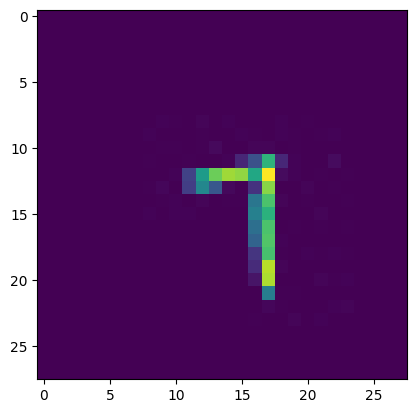

In [ ]:
g = plt.imshow(x_test[0][:,:,0])

**Build AlexNet with Keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(filters = 64, input_shape=(28,28,1), kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Conv2D(filters=192, kernel_size=(1,1), strides=(1,1), padding='valid'),
    Activation('relu'),
    BatchNormalization(),
    
    Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Flatten(),
    Dense(2048),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),
    
    Dense(2048),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(800),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),
    
    Dense(10),
    Activation('softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 23, 23, 128)       0

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=200, validation_data=(x_val,y_val), epochs = 200)

Epoch 1/200
267/267 [==============================] - 51s 117ms/step - loss: 0.2163 - accuracy: 0.9387 - val_loss: 3.0532 - val_accuracy: 0.3514
Epoch 2/200
267/267 [==============================] - 30s 112ms/step - loss: 0.0464 - accuracy: 0.9863 - val_loss: 3.2839 - val_accuracy: 0.5014
Epoch 3/200
267/267 [==============================] - 31s 115ms/step - loss: 0.0323 - accuracy: 0.9905 - val_loss: 0.7059 - val_accuracy: 0.8338
Epoch 4/200
267/267 [==============================] - 30s 114ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 5/200
267/267 [==============================] - 30s 113ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.5380 - val_accuracy: 0.8525
Epoch 6/200
267/267 [==============================] - 30s 114ms/step - loss: 0.0174 - accuracy: 0.9952 - val_loss: 0.0289 - val_accuracy: 0.9917
Epoch 7/200
267/267 [==============================] - 30s 112ms/step - loss: 0.0149 - accuracy: 0.9955 - val_loss: 0.2584 -

In [ ]:
results = model.predict(x_test)

1/1 [==============================] - 0s 308ms/step


In [ ]:
print(model.evaluate(x_val, y_val))

186/186 [==============================] - 2s 8ms/step - loss: 0.0535 - accuracy: 0.9953
[0.05346652865409851, 0.9952742457389832]


In [ ]:
print(model.evaluate(x_train, y_train))

1667/1667 [==============================] - 13s 8ms/step - loss: 0.0024 - accuracy: 0.9997
[0.0023716301657259464, 0.9996623992919922]


In [ ]:
model.save("Number_AlexNet_Model.h5")

In [ ]:
# !cp modelabdulla.h5 /content/drive/MyDrive/abdulla

In [ ]:
# !ls /content/drive/MyDrive/abdulla

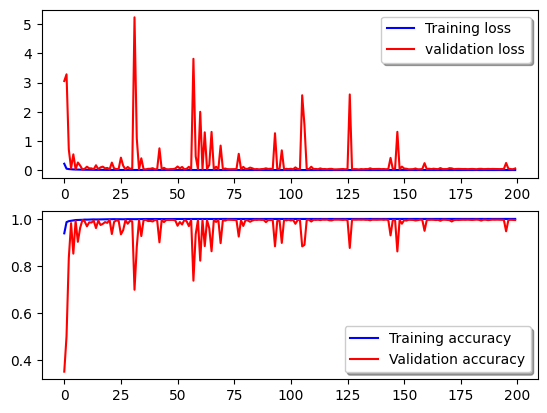

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

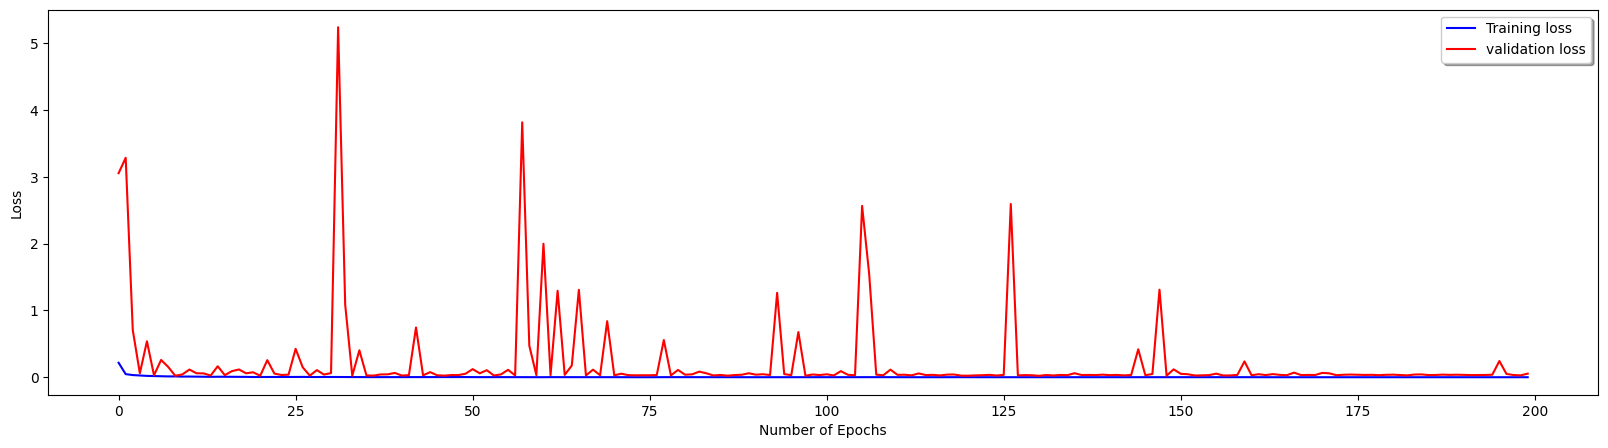

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(1,1, figsize=(20, 5))
ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="validation loss",axes = ax)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
legend = ax.legend(loc='best', shadow=True)

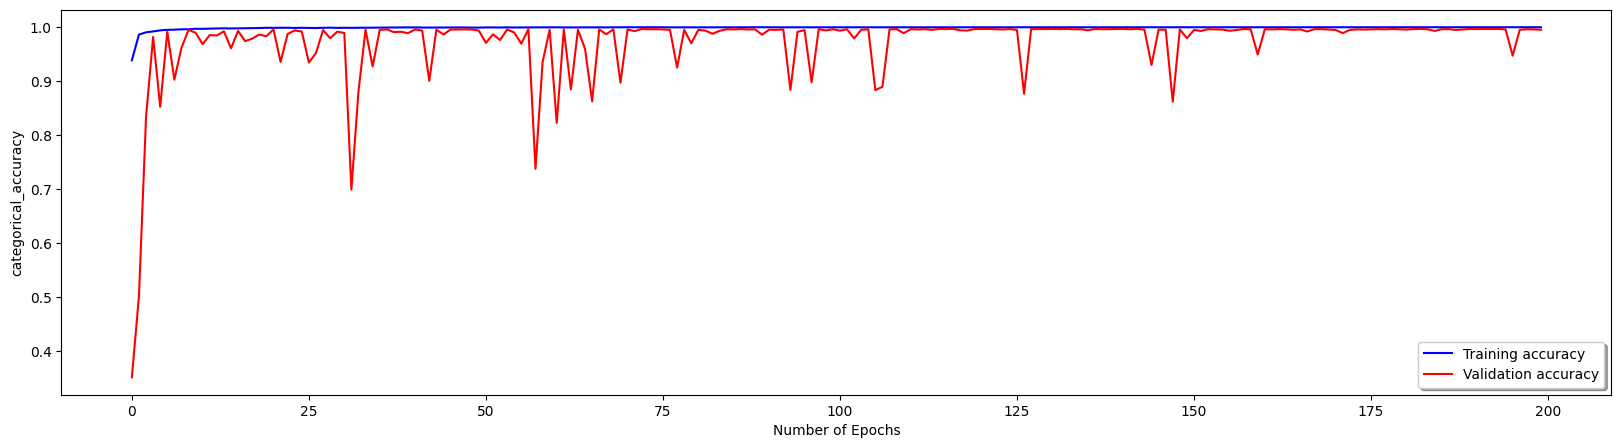

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
ax.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("categorical_accuracy")
legend = ax.legend(loc = 'best', shadow = True)

313/313 [==============================] - 2s 6ms/step


<Figure size 1500x1500 with 0 Axes>

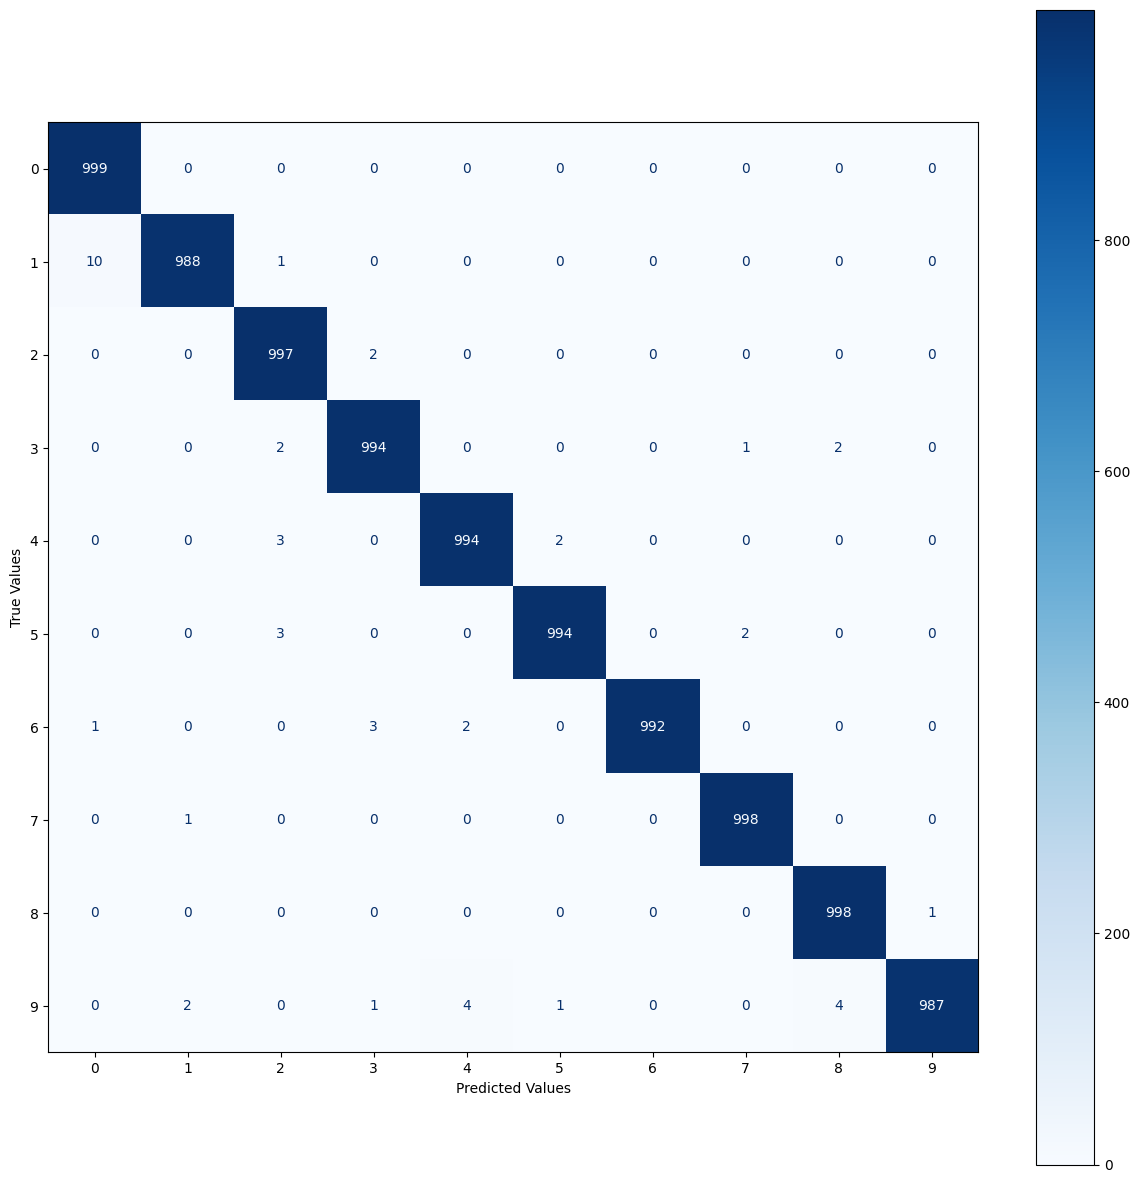

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure(figsize=(15, 15)) # Set Figure

# Calculate the confusion matrix
y_pred = model.predict(x_te)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_te, axis=1)
cm = confusion_matrix(y_true, y_pred, labels=range(10))

# Plot the confusion matrix using ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm, display_labels=range(10))
fig, ax = plt.subplots(figsize=(15, 15))
cmd.plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the number of true samples
n_true = np.sum(cm)

# Calculate the number of classified samples
n_classified = np.sum(cm, axis=0)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')

print("Number of True Samples:", n_true)
print("Number of Classified Samples:", n_classified)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Number of True Samples: 9989
Number of Classified Samples: [1010  991 1006 1000 1000  997  992 1001 1004  988]
Accuracy: 0.9951947141856041
Precision: 0.9952136281008805
Recall: 0.9951947141856041
F1 Score: 0.9951935507342944


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the number of true samples for each class
n_true = np.sum(cm, axis=1)

# Calculate the number of classified samples for each class
n_classified = np.sum(cm, axis=0)

# Calculate metrics for each class
class_accuracy = []
class_precision = []
class_recall = []
class_f1 = []

for i in range(10):
    # Calculate accuracy for class i
    class_acc = accuracy_score(y_true[y_true == i], y_pred[y_true == i])
    class_accuracy.append(class_acc)
    
    # Calculate precision for class i
    class_prec = precision_score(y_true, y_pred, average='macro', labels=[i])
    class_precision.append(class_prec)
    
    # Calculate recall for class i
    class_rec = recall_score(y_true, y_pred, average='macro', labels=[i])
    class_recall.append(class_rec)
    
    # Calculate F1 score for class i
    class_f1_score = f1_score(y_true, y_pred, average='macro', labels=[i])
    class_f1.append(class_f1_score)

# Print metrics for each class
for i in range(10):
    print(f"Metrics for Class {i}:")
    print("Number of True Samples:", n_true[i])
    print("Number of Classified Samples:", n_classified[i])
    print("Accuracy:", class_accuracy[i])
    print("Precision:", class_precision[i])
    print("Recall:", class_recall[i])
    print("F1 Score:", class_f1[i])
    print()


Metrics for Class 0:
Number of True Samples: 999
Number of Classified Samples: 1010
Accuracy: 1.0
Precision: 0.9891089108910891
Recall: 1.0
F1 Score: 0.9945246391239423

Metrics for Class 1:
Number of True Samples: 999
Number of Classified Samples: 991
Accuracy: 0.988988988988989
Precision: 0.9969727547931383
Recall: 0.988988988988989
F1 Score: 0.992964824120603

Metrics for Class 2:
Number of True Samples: 999
Number of Classified Samples: 1006
Accuracy: 0.997997997997998
Precision: 0.9910536779324056
Recall: 0.997997997997998
F1 Score: 0.9945137157107233

Metrics for Class 3:
Number of True Samples: 999
Number of Classified Samples: 1000
Accuracy: 0.994994994994995
Precision: 0.994
Recall: 0.994994994994995
F1 Score: 0.9944972486243121

Metrics for Class 4:
Number of True Samples: 999
Number of Classified Samples: 1000
Accuracy: 0.994994994994995
Precision: 0.994
Recall: 0.994994994994995
F1 Score: 0.9944972486243121

Metrics for Class 5:
Number of True Samples: 999
Number of Classif

In [ ]:
x_test.shape,  y_test.shape

((1, 28, 28, 1), (1, 10))

In [ ]:
import tensorflow as tf

186/186 [==============================] - 1s 6ms/step


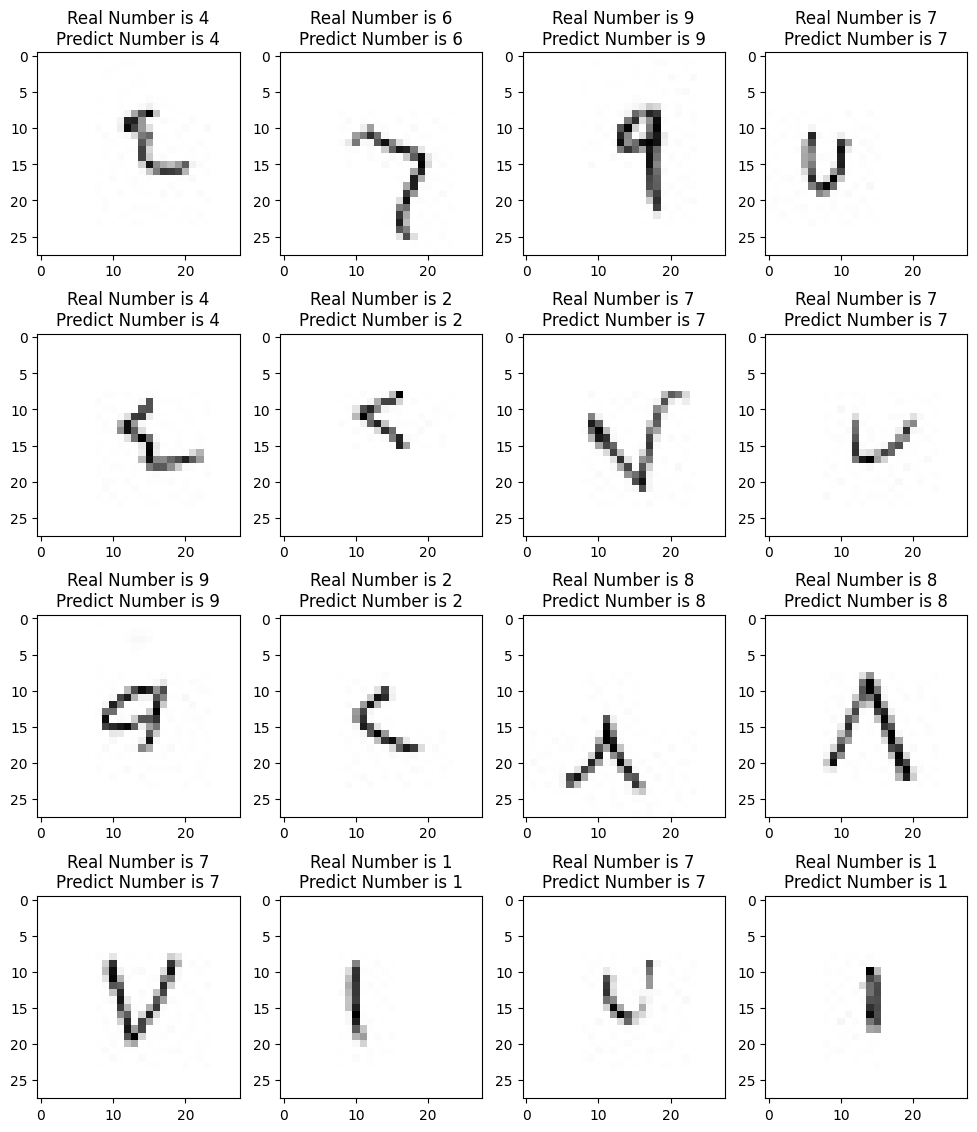

In [ ]:
y_pred = model.predict(x_val)
X_test__ = tf.reshape(x_val, [x_val.shape[0], 28, 28])

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");